In [11]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

%matplotlib inline

In [8]:
plt.style.use("fivethirtyeight")

In [3]:
iris = pd.read_csv('../../assets/datasets/iris.csv')

In [4]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Split the set into two sets

"X" will be the data and "Y" will be the class labels

In [5]:
X = iris.iloc[:, :-1]

In [13]:
y = iris["Name"]
le = LabelEncoder()
y_num = le.fit_transform(y)

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

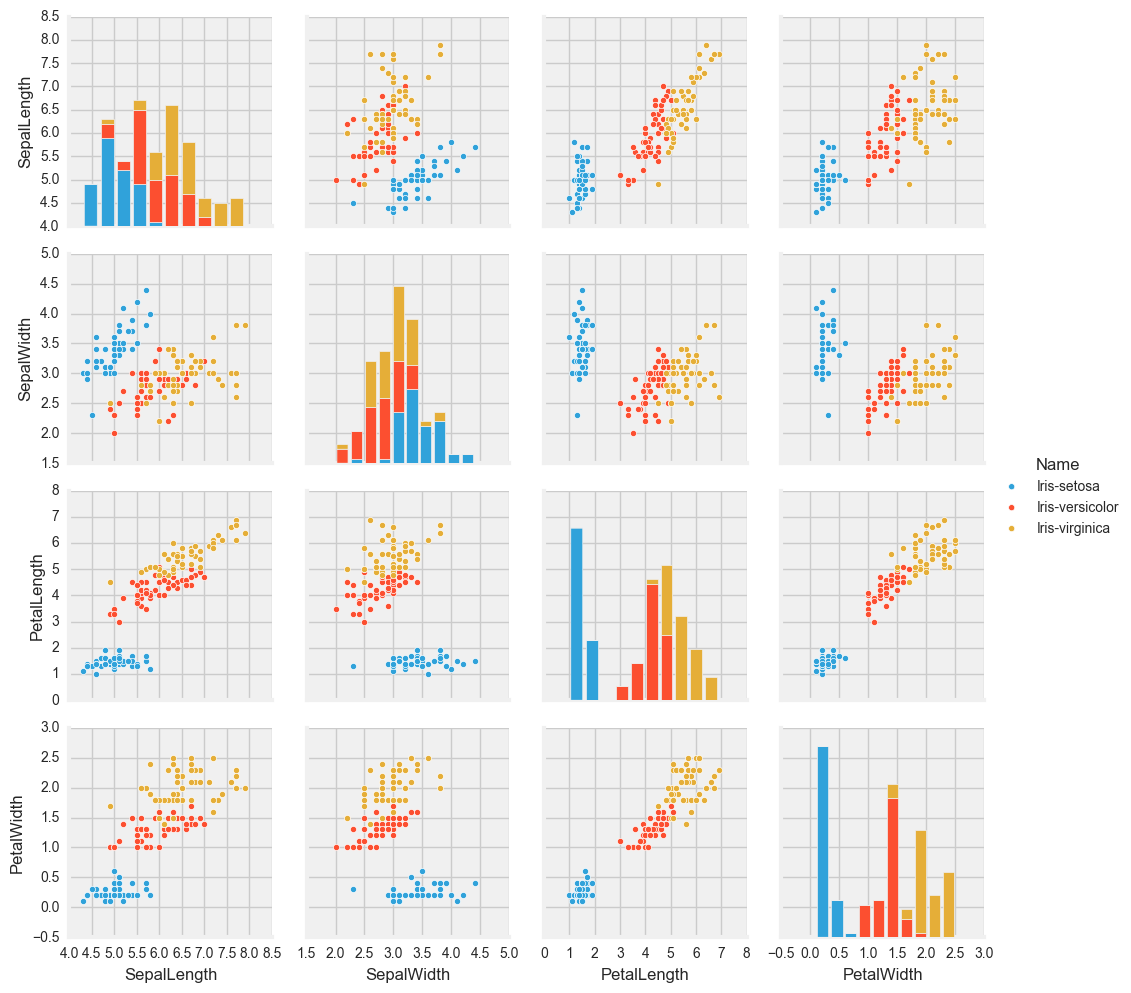

In [17]:
sns.pairplot(iris, hue="Name");

## Step 3: Dimensionality Reduction

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [52]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Now, let's set up our data for decomposition by creating a covariance matrix

Now, decompose the the covariance matrix

In [53]:
cov_mat = np.cov(X_standard.T)

Check the eigenvalues and eigenvectors

In [54]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [55]:
all_eig = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i,_ in enumerate(eigenValues)]

In [56]:
all_eig.sort()
all_eig.reverse()

In [57]:
all_eig

[(2.9303537755893192,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.92740362151734124,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163986,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020746013995595971,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

The eigenvectors with the lowest eigenvalues can be dropped

In [58]:
# So we just keep the 1st one?

In [59]:
W = np.hstack(all_eig[0][1].reshape(len(eigenValues),1))

In [60]:
X_reduced = X_standard.dot(W)

Calculate the explained variance

In [61]:
tot = sum(eigenValues)
var_exp = [(i / tot)*100 for i in sorted(eigenValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [62]:
cum_var_exp

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

(0, 110)

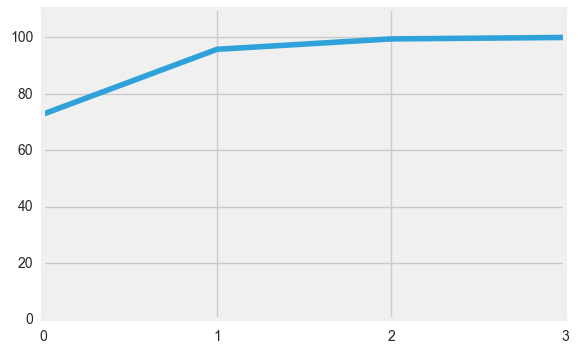

In [64]:
plt.plot(range(len(cum_var_exp)), cum_var_exp, '-');
plt.xticks(range(len(cum_var_exp)));
plt.ylim((0,110))

What does the explained variance tell us?